<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Austin Bike Share</b>
</header>

<p style = 'font-size:16px;font-family:Arial'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Information about Geospatial datatype can be found at: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Geospatial-Data-Types/July-2021'>https://docs.teradata.com/r/Teradata-VantageTM-Geospatial-Data-Types/July-2021</a></li>
    <li>Information about Temporal datatype can be found at: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021'>https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021</a></li>
</ul>

<p style = 'font-size:16px;font-family:Arial'><b>Contents</b></p>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Connect to Teradata </li>
    <li>Explore the data </li>
    <li>Load local data </li>
    <li>Create and Explore Temporal, Time index and Geospatial data </li>
    <li>Clean up </li>
<hr>

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'> Accessing the Data
<p style = 'font-size:16px;font-family:Arial'>These demos will work either with foreign tables accessed from Cloud Storage via NOS or you may import the tables to your machine. If you import data for multiple demos, you may need to use the Data Dictionary "Manage Your Space" routine to cleanup tables you no longer need. 
    
<p style = 'font-size:16px;font-family:Arial'>Use the link below to access the 2 options for using data from the data dictionary notebook:

[Click Here to get data for this notebook](../Data_Dictionary/Data_Dictionary.ipynb#TRNG_AustinBikeShare)

[Click Here to Manage Your Space](../Data_Dictionary/Data_Dictionary.ipynb#Manage_Your_Space)

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Background on Teradata SQL Kernel in Jupyter</b>

<p style = 'font-size:16px;font-family:Arial'>If you are unfamiliar with some of the things you can do in Jupyter to interact with Vantage, the following reference may help, or, just skip to the connect step.</p>
<p style = 'font-size:16px;font-family:Arial'>Let's start by checking the main help page</p>

In [ ]:
%help

<p style = 'font-size:16px;font-family:Arial'>This notebook will load one set of data. Here is the description of the data loading command:</p>

In [ ]:
%help dataload

<p style = 'font-size:16px;font-family:Arial'>To connect I need to use %connect, so let's see what connections already exist with %lsconnect:</p>

In [ ]:
%lsconnect

<p style = 'font-size:16px;font-family:Arial'>You can use %help followed by a command to get details on other commands. Here is the help page for %connect</p>    

In [ ]:
%help connect

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Connect and explore the data</b>

<p style = 'font-size:16px;font-family:Arial'>Let's connect to our Teradata system</p>    

In [1]:
%connect local

Password: ···


Success: 'local' connection established and activated for user 'demo_user'


<p style = 'font-size:16px;font-family:Arial'>As a warm up, let us look at the tables provided</p>       

In [3]:
SELECT 
    DatabaseName,
    TableName
FROM
    DBC.Tables
WHERE
    DatabaseName = 'TRNG_AustinBikeShare'

,DatabaseName,TableName
1,TRNG_AustinBikeShare,trips
2,TRNG_AustinBikeShare,Weather


In [4]:
select count(*) from TRNG_AustinBikeShare.trips

,Count(*)
1,649231


<p style = 'font-size:16px;font-family:Arial'>We can explore the tables manually as below.  Alternatively, from the Jupyter window commands, select File/New Launcher, (or just ctrl-shift-L) to start a new launcher and click the Teradata Navigator tile to view all of the databases/tables/views on your machine. (Foreign tables using NOS to connect to cloude storage are defined in the database gs_tables_db and the views for this notebook are in TRNG_AustinBikeShare). </p>    

In [5]:
SELECT
    TOP 10
    *
FROM
    TRNG_AustinBikeShare.trips

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,MONTH_NUM,start_station_id,start_station_name,start_time,subscriber_type,trip_id,YEAR_NUM
1,854,10:28:44,15,2711,Barton Springs @ Kinney Ave,10,3377,MoPac Pedestrian Bridge @ Veterans Drive,2016-10-11 06:28:44.000000,Weekender,12336998,2016
2,176,7:12:58,14,2823,Capital Metro HQ - East 5th at Broadway,10,2542,Plaza Saltillo,2015-10-07 03:12:58.000000,Local365,9900295639,2015
3,327,18:12:00,2,2498,Convention Center / 4th St. @ MetroRail,4,2562,San Jacinto & 8th Street,2015-04-15 14:12:00.000000,Local30,9900115619,2015
4,572,14:04:35,27,2504,South Congress & Elizabeth,5,2538,Bullock Museum @ Congress & MLK,2017-05-27 10:04:35.000000,Explorer,14942659,2017
5,553,17:40:45,9,2565,Trinity & 6th Street,6,2563,Davis at Rainey Street,2016-06-14 13:40:45.000000,Walk Up,10468587,2016
6,655,15:01:48,47,3377,MoPac Pedestrian Bridge @ Veterans Drive,8,3377,MoPac Pedestrian Bridge @ Veterans Drive,2016-08-22 11:01:48.000000,Walk Up,11535024,2016
7,22,20:12:06,4,2552,3rd & West,10,2499,City Hall / Lavaca & 2nd,2015-10-09 16:12:06.000000,Local30,9900297719,2015
8,716,6:36:49,8,2563,Davis at Rainey Street,5,3291,11th & San Jacinto,2017-05-31 02:36:49.000000,Local365,14990682,2017
9,160,7:12:00,205,2541,State Capitol @ 14th & Colorado,2,2541,State Capitol @ 14th & Colorado,2014-02-16 02:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900024671,2014
10,334,8:12:00,7,2565,Trinity & 6th Street,4,2563,Davis at Rainey Street,2014-04-29 04:12:00.000000,Annual Membership (Austin B-cycle),9900107034,2014


<p style = 'font-size:16px;font-family:Arial'>We can start with some basic analysis to understand the data.  First, the most popular <p style = 'font-size:16px;font-family:Arial'>We can explore the tables manually as below.  Alternatively, from the Jupyter window commands, select File/New Launcher, (or just ctrl-shift-L) to start a new launcher and click the Teradata Navigator tile to view all of the databases/tables/views on your machine. (Foreign tables using NOS to connect to cloude storage are defined in the database gs_tables_db and the views for this notebook are in TRNG_AustinBikeShare). </p>    stations. </p>    

In [16]:
SELECT
    TOP 20
    start_station_name,
    COUNT(1) AS trips
FROM
    TRNG_AustinBikeShare.trips
GROUP BY 1
ORDER BY 2 DESC

,start_station_name,trips
1,Riverside @ S. Lamar,28695
2,City Hall / Lavaca & 2nd,28535
3,5th & Bowie,26669
4,2nd & Congress,26612
5,4th & Congress,24972
6,Convention Center / 4th St. @ MetroRail,24357
7,Rainey St @ Cummings,23468
8,Davis at Rainey Street,22273
9,Capitol Station / Congress & 11th,20056
10,Pfluger Bridge @ W 2nd Street,19434


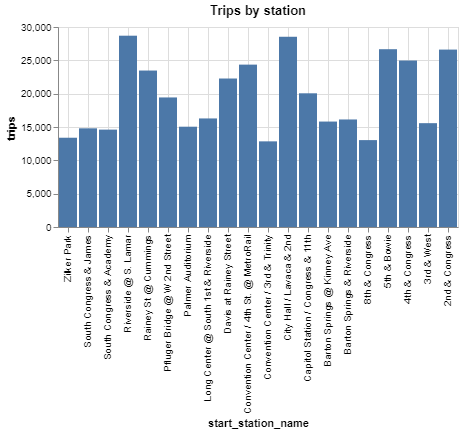

In [17]:
%chart start_station_name, trips, title=Trips by station, sortx=descending

<p style = 'font-size:16px;font-family:Arial'>Then look at the pattern of bimk usage over time. </p>    

In [18]:
SELECT
    trunc(start_time, 'Month') AS start_Month,
    COUNT(1) AS trips
FROM
    TRNG_AustinBikeShare.trips
GROUP BY 1
ORDER BY 1

,start_Month,trips
1,2013-12-01,1469
2,2014-01-01,3373
3,2014-02-01,5519
4,2014-03-01,25769
5,2014-04-01,14465
6,2014-05-01,15078
7,2014-06-01,13620
8,2014-07-01,14351
9,2014-08-01,11146
10,2014-09-01,11539


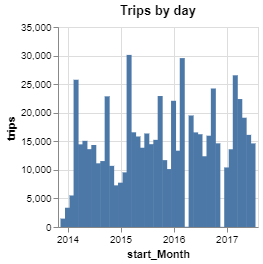

In [19]:
%chart start_Month, trips, title=Trips by day, typex=t

If we chart the data, we observe two things:
1. there are two months where the data is nearly missing
2. The peak usage month is as much as 3x the least usage month

This could be influenced by the weather.

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3.Load local data.</b>

<p style = 'font-size:16px;font-family:Arial'>To perform Geospatial processing of the trip information, we are going to need the location of the stations with geospatial coordinates. Vantage supports geospatial representation of shapes, lines, and points.  Parquet in cloud storage and the %dataload used to load CSV files doesn't support User Defined Types (UDTs) that are used to hold geospatial points, lines, and shapes.  So we will load the data into a staging table and then insert/select to convert to a geospatial data type</p>

<p style = 'font-size:16px;font-family:Arial'>We will create a few tables in our personal database</p>    

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>3.1 Load Stations data from local file (in Jupyter)</b></p>    

In [6]:
CREATE TABLE stations_staging (
    lat            DECIMAL(18,5),
    location       VARCHAR(200),    -- e.g. "POINT(30.27041 -97.75046)"
    longitude      DECIMAL(18,5),
    name           VARCHAR(100),
    station_id     INTEGER,
    status         VARCHAR(50)
)
PRIMARY INDEX (station_id);

Success: 0 rows affected

In [7]:
CREATE TABLE stations (
    lat            DECIMAL(18,5),
    location       SYSUDTLIB.ST_Geometry,     -- e.g. "POINT(30.27041 -97.75046)"
    longitude      DECIMAL(18,5),
    name           VARCHAR(100),
    station_id     INTEGER,
    status         VARCHAR(50)
)
PRIMARY INDEX (station_id);

Success: 0 rows affected

In [8]:
%dataload DATABASE=, TABLE=stations_staging, FILEPATH=UseCases/AustinBikeShare/stations_staging.csv

Using database: DEMO_USER
2022-09-05T15:07:33.676 Start Batch Loading...
     
Data Load: Number Rows Loaded = 72, Elapsed Time = 00:00:00.362, History ID = 150
Success Loading Data: from file,'/home/jovyan/JupyterLabRoot/UseCases/AustinBikeShare/stations_staging.csv', into table, DEMO_USER.stations_staging.

In [9]:
INSERT INTO stations SELECT * FROM stations_staging

Success: 72 rows affected

<p style = 'font-size:16px;font-family:Arial'>The Geospatial columns have a type and one or more pairs of lattitude and longitude. The latitude and Longitude columns were included in the table so you could see how a simple geospatial feature (a POINT) is represented. </p>

In [10]:
SELECT
    TOP 10 *
FROM
    stations

,lat,location,longitude,name,station_id,status
1,30.25579,POINT (30.25579 -97.73982),-97.73982,Rainey St @ Cummings,2707,active
2,30.25457,POINT (30.25457 -97.74258),-97.74258,Boardwalk West,3687,active
3,30.25103,POINT (30.25103 -97.74926),-97.74926,South Congress & James,2503,active
4,30.26200,POINT (30.262 -97.76118),-97.76118,Barton Springs @ Kinney Ave,2711,active
5,30.26416,POINT (30.26416 -97.73289),-97.73289,5th & San Marcos,2564,moved
6,30.28118,POINT (30.28118 -97.75219),-97.75219,Pease Park,3464,active
7,30.26476,POINT (30.26476 -97.74678),-97.74678,City Hall / Lavaca & 2nd,2499,active
8,30.26426,POINT (30.26426 -97.74023),-97.74023,Convention Center / 3rd & Trinity,2539,active
9,30.26896,POINT (30.26896 -97.72843),-97.72843,East 11th St. at Victory Grill,2568,active
10,30.26717,POINT (30.26717 -97.75484),-97.75484,Pfluger Bridge @ W 2nd Street,2566,active


<p style = 'font-size:16px;font-family:Arial'>There are numerous geospatial functions, but we can demonstrate the basics by finding the distance from the main office (station_id = 1001) to other stations.</p>

In [26]:
select top 10  s.station_id, s.name, 
round(city.location.ST_SphericalDistance(s.location), 0) Distance_Meters
from stations s, stations city where city.station_id = 1001 order by 1;

,station_id,name,Distance_Meters
1,1001,OFFICE/Main/Shop/Repair,0
2,1002,6th & Navasota St.,1266
3,1003,8th & Guadalupe,629
4,1004,Red River & LBJ Library,1393
5,1005,State Parking Garage @ Brazos & 18th,332
6,1006,Zilker Park West,3147
7,1007,Lavaca & 6th,589
8,1008,Nueces @ 3rd,1050
9,2494,2nd & Congress,415
10,2495,4th & Congress,432


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>3.2 Examine the weather table</b></p>    

In [20]:
Select count(*) from TRNG_AustinBikeShare.weather

,Count(*)
1,24592


In [4]:
SELECT TOP 10 * FROM TRNG_AustinBikeShare.weather

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2015-11-16 10:00:00.000000,291.8,291.15,293.15,1015,93,2,150,,,90,701,Mist,mist,50d
2,2016-05-04 21:00:00.000000,297.58,296.48,299.15,1015,41,2,330,,,1,800,Clear,sky is clear,01n
3,2014-05-05 07:00:00.000000,289.16,287.59,290.37,1013,85,4,187,,,0,800,Clear,Sky is Clear,01n
4,2017-01-13 14:00:00.000000,296.46,293.15,298.15,1026,88,4,160,,,75,803,Clouds,broken clouds,04d
5,2017-08-11 02:00:00.000000,300.77,299.15,302.15,1018,69,2,190,,,1,800,Clear,sky is clear,01n
6,2016-07-24 11:00:00.000000,303.24,301.15,305.37,1016,66,2,0,,,1,800,Clear,sky is clear,01d
7,2015-07-24 16:00:00.000000,308.35,307.15,309.82,1016,46,4,190,,,40,802,Clouds,scattered clouds,03d
8,2017-07-24 06:00:00.000000,297.71,296.15,299.15,1014,83,1,0,,,1,800,Clear,sky is clear,01n
9,2014-03-04 05:00:00.000000,272.15,271.15,273.15,1023,86,1,100,,,90,804,Clouds,overcast clouds,4
10,2015-06-29 20:00:00.000000,304.88,304.26,305.15,1014,55,3,180,,,1,800,Clear,sky is clear,01n


<p style = 'font-size:16px;font-family:Arial'>The temperature data appears to be reported hourly. (the minutes and seconds are always zero). The temperature columns are in Kelvin which few people use to decide if it is good bicycle weather, so we will create a view over the weather table to convert the temperature units. We will also average the temperature for the day </p>

In [22]:
replace view austin_weather as
select trunc(dt, 'Month') dt, 
round( avg( (temp - 273.15) * 9/5 + 32 ) ,0) AveTemp,
sum(case when weather_main in ('Rain', 'Mist') then 1 else 0 end) Precip_hours
from TRNG_AustinBikeShare.weather group by 1;

Success: 4 rows affected

In [23]:
Select  * from austin_weather order by 1

,dt,AveTemp,Precip_hours
1,2013-12-01,45,49
2,2014-01-01,48,131
3,2014-02-01,51,63
4,2014-03-01,57,24
5,2014-04-01,67,82
6,2014-05-01,73,207
7,2014-06-01,80,68
8,2014-07-01,82,135
9,2014-08-01,84,2
10,2015-06-01,82,29


<p style = 'font-size:16px;font-family:Arial'>If we plot the data, we find we are missing some data, but we get an idea of the typical temperature ranges.  If we look at the hours each month where precipitation is occuring, we see some patterns there that could also be impacting the number of trips.  </p>

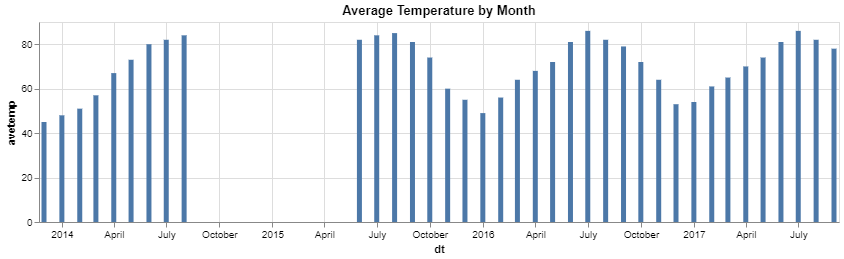

In [24]:
%chart dt, avetemp, width=800, title=Average Temperature by Month

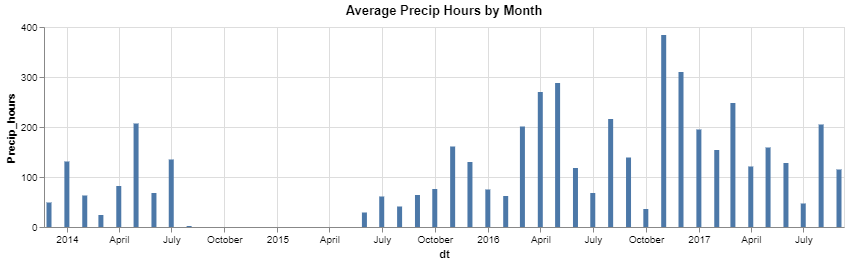

In [25]:
%chart dt, Precip_hours, width=800, title=Average Precip Hours by Month

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Create and Explore Temporal, Time index and Geospatial data</b>    

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.1 Create a temporal table with weather data</b></p>    

In [5]:
CREATE TABLE weather_pti (
    temp          FLOAT,
    temp_min      FLOAT,
    temp_max      FLOAT,
    pressure      INTEGER,
    humidity      INTEGER,
    wind_speed    INTEGER,
    wind_deg      INTEGER,
    rain_1h       FLOAT,
    rain_3h       FLOAT,
    clouds        INTEGER,
    weather_id    INTEGER,
    weather_main  VARCHAR(50),
    weather_desc  VARCHAR(50),
    weather_icon  VARCHAR(50)
)
PRIMARY TIME INDEX (TIMESTAMP(6), DATE '2013-12-20', MINUTES(60));

Success: 0 rows affected

In [6]:
INSERT INTO weather_pti
SELECT
    dt,
    round( ((temp - 273.15) * 9/5 + 32 ) ,0),
    round( ((temp_min - 273.15) * 9/5 + 32 ) ,0),
    round( ((temp_max - 273.15) * 9/5 + 32 ) ,0),
    pressure,
    humidity,
    wind_speed,
    wind_deg,
    rain_1h,
    rain_3h,
    clouds,
    weather_id,
    weather_main,
    weather_desc,
    weather_icon
FROM 
    TRNG_AustinBikeShare.weather;

Success: 24589 rows affected

In [7]:
SELECT TOP 10 * FROM weather_pti;

,TD_TIMECODE,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2013-12-21 03:00:00.000000,64,48,73,1002,93,0,69,2.03,,0,501,Rain,moderate rain,10n
2,2013-12-21 04:00:00.000000,54,41,70,1003,85,4,342,0.88,,0,701,Mist,mist,50n
3,2013-12-21 04:00:00.000000,54,41,70,1003,85,4,342,0.88,,0,500,Rain,light rain,10n
4,2013-12-21 18:00:00.000000,60,56,64,1004,70,1,118,,0,0,800,Clear,Sky is Clear,01n
5,2013-12-22 09:00:00.000000,41,37,45,1015,95,2,45,0.25,,0,500,Rain,light rain,10d
6,2013-12-22 10:00:00.000000,42,40,44,1017,70,1,29,0.25,,0,500,Rain,light rain,10d
7,2013-12-21 21:00:00.000000,53,47,58,1004,75,0,351,,0,0,800,Clear,Sky is Clear,01n
8,2013-12-21 03:00:00.000000,64,48,73,1002,93,0,69,2.03,,0,701,Mist,mist,50n
9,2013-12-21 02:00:00.000000,70,69,72,1003,91,0,297,2.16,,0,501,Rain,moderate rain,10n
10,2013-12-20 22:00:00.000000,69,67,70,1005,70,1,118,,0,0,800,Clear,Sky is Clear,01n


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.2 Create a view for all trips with start/end stations data and a GEOSEQUENCE with start/end lat/long/time</b></p>

In [42]:
REPLACE VIEW trips_geo AS
SELECT
    t.bikeid,
    t.trip_ID,
    t.subscriber_type,
    t.start_station_id,
    COALESCE(t.start_station_name, st.NAME) AS start_station_name,
    t.start_time,
    st.status starting_station_status,
    t.end_station_id,
    COALESCE(t.end_station_name, ed.NAME) AS end_station_name,
    t.start_time 
        + CAST(t.duration_minutes/60 AS INTERVAL HOUR(4)) 
        + CAST(t.duration_minutes MOD 60 AS INTERVAL MINUTE(4)) AS end_time,
    ed.status AS End_station_status,
    t.duration_minutes,
    CAST('GEOSEQUENCE( ('
        || COALESCE(st.Longitude,-98.272797)
        || ' '
        || COALESCE(st.Lat,30.578245)
        || ','
        || COALESCE(ed.longitude,-98.272797)
        || ' '
        || COALESCE(ed.lat,30.578245)
        || '), ('
        || CAST(CAST(t.start_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || ','
        || CAST(CAST(end_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || '), ('
        || '1,2), (0) )' AS ST_GEOMETRY) AS GEOM
FROM
    TRNG_AustinBikeShare.trips AS t
    LEFT JOIN stations AS st ON t.start_station_id = st.station_id
    LEFT JOIN stations AS ed ON t.end_station_id = ed.station_id;

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial'>The code above merely defined a view which enhances the trip data with a Geosequence field containing both the end points of the trip and the time at each point of the trip. </p>

In [43]:
SELECT TOP 10 * FROM trips_geo

,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,start_time,starting_station_status,end_station_id,end_station_name,end_time,End_station_status,duration_minutes,GEOM
1,26,8602786,Walk Up,2711,Barton Springs @ Kinney Ave,2016-01-30 11:28:26.000000,active,2711,Barton Springs @ Kinney Ave,2016-01-30 12:48:26.000000,active,80,"GEOSEQUENCE((-97.76118 30.262,-97.76118 30.262),(2016-01-30 11:28:26.000000,2016-01-30 12:48:26.000000),(1,2),(0))"
2,354,9900246392,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,2014-09-21 13:12:00.000000,active,2547,Guadalupe & 21st,2014-09-21 13:34:00.000000,moved,22,"GEOSEQUENCE((-97.74127 30.2726,-97.74198 30.28395),(2014-09-21 13:12:00.000000,2014-09-21 13:34:00.000000),(1,2),(0))"
3,998,14232060,Walk Up,2498,Convention Center / 4th St. @ MetroRail,2017-03-29 09:52:42.000000,active,2547,Guadalupe & 21st,2017-03-29 10:20:42.000000,moved,28,"GEOSEQUENCE((-97.739 30.26483,-97.74198 30.28395),(2017-03-29 09:52:42.000000,2017-03-29 10:20:42.000000),(1,2),(0))"
4,815,9900273840,Annual Membership (Austin B-cycle),2499,City Hall / Lavaca & 2nd,2014-10-10 11:12:00.000000,active,,Zilker Park at Barton Springs & William Barton Drive,2014-10-10 11:31:00.000000,,19,"GEOSEQUENCE((-97.74678 30.26476,-98.272797 30.578245),(2014-10-10 11:12:00.000000,2014-10-10 11:31:00.000000),(1,2),(0))"
5,254,9900120309,Walk Up,2567,Palmer Auditorium,2015-04-24 09:12:00.000000,active,,Zilker Park at Barton Springs & William Barton Drive,2015-04-24 09:30:00.000000,,18,"GEOSEQUENCE((-97.75346 30.25971,-98.272797 30.578245),(2015-04-24 09:12:00.000000,2015-04-24 09:30:00.000000),(1,2),(0))"
6,391,13782233,Local30,2711,Barton Springs @ Kinney Ave,2017-02-19 09:33:10.000000,active,3464,Pease Park,2017-02-19 09:54:10.000000,active,21,"GEOSEQUENCE((-97.76118 30.262,-97.75219 30.28118),(2017-02-19 09:33:10.000000,2017-02-19 09:54:10.000000),(1,2),(0))"
7,745,11866386,Walk Up,3464,Pease Park,2016-09-11 04:48:56.000000,active,3464,Pease Park,2016-09-11 04:49:56.000000,active,1,"GEOSEQUENCE((-97.75219 30.28118,-97.75219 30.28118),(2016-09-11 04:48:56.000000,2016-09-11 04:49:56.000000),(1,2),(0))"
8,29,13435769,Explorer,2539,Convention Center / 3rd & Trinity,2017-01-14 06:32:35.000000,active,3464,Pease Park,2017-01-14 06:53:35.000000,active,21,"GEOSEQUENCE((-97.74023 30.26426,-97.75219 30.28118),(2017-01-14 06:32:35.000000,2017-01-14 06:53:35.000000),(1,2),(0))"
9,523,9900234667,Walk Up,2707,Rainey St @ Cummings,2015-08-22 10:12:00.000000,active,,Zilker Park at Barton Springs & William Barton Drive,2015-08-22 10:43:00.000000,,31,"GEOSEQUENCE((-97.73982 30.25579,-98.272797 30.578245),(2015-08-22 10:12:00.000000,2015-08-22 10:43:00.000000),(1,2),(0))"
10,75,13501418,Walk Up,2563,Davis at Rainey Street,2017-01-21 06:59:25.000000,active,2547,Guadalupe & 21st,2017-01-21 08:10:25.000000,moved,71,"GEOSEQUENCE((-97.73845 30.26019,-97.74198 30.28395),(2017-01-21 06:59:25.000000,2017-01-21 08:10:25.000000),(1,2),(0))"


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.3 Create a Time Index table of the trips to accelerate time related analysis</b></p>
<p style = 'font-size:16px;font-family:Arial'>Vantage supports tables with a Primary Time Index (PTI) which is used to store and quickly lookup data that arrives based on time. This time-aware index both distributes data across the units of parallelism but allows the optimizer to build plans which go directly to the unit of parallelism where the data is stored based on the time constraint.<br>
In this case, we will declare the index to have hourly granularity with a baseline time earlier that any date of data we have. The database automatically creates the first column with the name TD_TIMECODE based on the primary index declaration. When we insert data, we will use the start_time column as that value </p>

In [44]:
CREATE TABLE trips_geo_pti (
    bikeid                    INTEGER,
    trip_id                   BIGINT,
    subscriber_type           VARCHAR(50),
    start_station_id          INTEGER,
    start_station_name        VARCHAR(100),
    starting_station_status   VARCHAR(50),
    end_station_id            INTEGER,
    end_station_name          VARCHAR(100),
    end_time                  TIMESTAMP(6),
    end_station_status        VARCHAR(50),
    duration_minutes          INTEGER,
    geom                      SYSUDTLIB.ST_GEOMETRY(16776192) INLINE LENGTH 9920
)
PRIMARY TIME INDEX (TIMESTAMP(6), DATE '2013-12-20', MINUTES(60));

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial'>We now populate the local table.  If you are getting data from the cloud storage, this could take a minute.   </p>

In [45]:
INSERT INTO trips_geo_pti
SELECT
    start_time,
    bikeid,
    trip_id,
    subscriber_type,
    start_station_id,
    start_station_name,
    starting_station_status,
    end_station_id,
    end_station_name,
    end_time,
    End_station_status,
    duration_minutes,
    geom
FROM
    trips_geo;

Success: 649231 rows affected

In [46]:
SELECT TOP 10 * FROM trips_geo_pti

,TD_TIMECODE,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,starting_station_status,end_station_id,end_station_name,end_time,end_station_status,duration_minutes,geom
1,2013-12-21 16:12:00.000000,281,9900334071,24-Hour Kiosk (Austin B-cycle),2495,4th & Congress,active,2503,South Congress & James,2013-12-21 17:14:00.000000,active,62,"GEOSEQUENCE((-97.74378 30.26634,-97.74926 30.25103),(2013-12-21 16:12:00.000000,2013-12-21 17:14:00.000000),(1,2),(0))"
2,2013-12-21 16:12:00.000000,559,9900334073,Founding Member (Austin B-cycle),2500,Republic Square,moved,2500,Republic Square,2013-12-21 16:17:00.000000,moved,5,"GEOSEQUENCE((-97.74802 30.26751,-97.74802 30.26751),(2013-12-21 16:12:00.000000,2013-12-21 16:17:00.000000),(1,2),(0))"
3,2013-12-21 17:12:00.000000,102,9900334078,24-Hour Kiosk (Austin B-cycle),2500,Republic Square,moved,2498,Convention Center / 4th St. @ MetroRail,2013-12-21 17:18:00.000000,active,6,"GEOSEQUENCE((-97.74802 30.26751,-97.739 30.26483),(2013-12-21 17:12:00.000000,2013-12-21 17:18:00.000000),(1,2),(0))"
4,2013-12-21 17:12:00.000000,975,9900334077,24-Hour Kiosk (Austin B-cycle),2500,Republic Square,moved,2498,Convention Center / 4th St. @ MetroRail,2013-12-21 17:19:00.000000,active,7,"GEOSEQUENCE((-97.74802 30.26751,-97.739 30.26483),(2013-12-21 17:12:00.000000,2013-12-21 17:19:00.000000),(1,2),(0))"
5,2013-12-21 17:12:00.000000,287,9900334079,24-Hour Kiosk (Austin B-cycle),2500,Republic Square,moved,2498,Convention Center / 4th St. @ MetroRail,2013-12-21 17:18:00.000000,active,6,"GEOSEQUENCE((-97.74802 30.26751,-97.739 30.26483),(2013-12-21 17:12:00.000000,2013-12-21 17:18:00.000000),(1,2),(0))"
6,2013-12-21 17:12:00.000000,647,9900334075,24-Hour Kiosk (Austin B-cycle),2499,City Hall / Lavaca & 2nd,active,2499,City Hall / Lavaca & 2nd,2013-12-21 17:32:00.000000,active,20,"GEOSEQUENCE((-97.74678 30.26476,-97.74678 30.26476),(2013-12-21 17:12:00.000000,2013-12-21 17:32:00.000000),(1,2),(0))"
7,2013-12-21 17:12:00.000000,661,9900334080,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2498,Convention Center / 4th St. @ MetroRail,2013-12-21 17:31:00.000000,active,19,"GEOSEQUENCE((-97.74127 30.2726,-97.739 30.26483),(2013-12-21 17:12:00.000000,2013-12-21 17:31:00.000000),(1,2),(0))"
8,2013-12-21 16:12:00.000000,80,9900334072,24-Hour Kiosk (Austin B-cycle),2495,4th & Congress,active,2503,South Congress & James,2013-12-21 18:34:00.000000,active,142,"GEOSEQUENCE((-97.74378 30.26634,-97.74926 30.25103),(2013-12-21 16:12:00.000000,2013-12-21 18:34:00.000000),(1,2),(0))"
9,2013-12-21 15:12:00.000000,823,9900334070,Founding Member (Austin B-cycle),2499,City Hall / Lavaca & 2nd,active,2499,City Hall / Lavaca & 2nd,2013-12-21 15:15:00.000000,active,3,"GEOSEQUENCE((-97.74678 30.26476,-97.74678 30.26476),(2013-12-21 15:12:00.000000,2013-12-21 15:15:00.000000),(1,2),(0))"
10,2013-12-21 15:12:00.000000,116,9900334069,24-Hour Kiosk (Austin B-cycle),2495,4th & Congress,active,2502,Barton Springs & Riverside,2013-12-21 15:24:00.000000,active,12,"GEOSEQUENCE((-97.74378 30.26634,-97.74872 30.2587),(2013-12-21 15:12:00.000000,2013-12-21 15:24:00.000000),(1,2),(0))"


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.4 Augment trips data with weather data and extract geospatial information</b></p> 
<p style = 'font-size:16px;font-family:Arial'>Finally, we bring the data together with the geosequenced trip information with the available weather data where the period of the weather report contains the start time (TD_TIMECODE) of the trip. </p>

In [ ]:
-- CREATE TABLE trips_and_weather AS (
    SELECT 
        t.start_station_name,
        t.end_station_name,
        t.bikeid,
        t.trip_id,
        t.geom.GetInitT() AS pickup_time,
        t.geom.GetFinalT() AS dropoff_time,
        t.geom.ST_POINTN(1).ST_SPHEROIDALDISTANCE(geom.ST_POINTN(2))/1000 AS total_distance,
        t.geom.ST_POINTN(1).ST_X() AS pickup_location_lon,
        t.geom.ST_POINTN(1).ST_Y() AS pickup_location_lat,
        t.geom.ST_POINTN(2).ST_X() AS dropoff_location_lon,
        t.geom.ST_POINTN(2).ST_Y() AS dropoff_location_lat,        
        t.duration_minutes,
        t.TD_TIMECODE as Trip_TIMECODE,
        wt.*
    FROM 
        trips_geo_pti AS t
        LEFT JOIN Weather_temporal AS wt ON wt.weather_duration contains t.TD_TIMECODE
        and pickup_time >= '2017-08-01 00:00:00'
--)
-- WITH DATA primary index(trip_id);

In [6]:
SELECT TOP 10 * FROM trips_and_weather where cast(pickup_time as date) between '2016-01-01' and '2016-12-31'

,start_station_name,end_station_name,bikeid,trip_id,pickup_time,dropoff_time,total_distance,pickup_location_lon,pickup_location_lat,dropoff_location_lon,dropoff_location_lat,duration_minutes,Trip_TIMECODE,TD_TIMECODE,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2nd & Congress,2nd & Congress,411,12536268,2016-10-24 13:11:39.000000,2016-10-24 14:30:39.000000,0,-97.74355,30.26408,-97.74355,30.26408,79,2016-10-24 13:11:39.000000,,,,,,,,,,,,,,,
2,Davis at Rainey Street,Red River & 8th Street,334,9168071,2016-03-17 09:43:55.000000,2016-03-17 09:55:55.000000,0.945255807987909,-97.73845,30.26019,-97.73646,30.26854,12,2016-03-17 09:43:55.000000,,,,,,,,,,,,,,,
3,4th & Congress,South Congress & Academy,745,11379821,2016-08-11 13:02:48.000000,2016-08-11 13:12:48.000000,1.6266930577344831,-97.74378,30.26634,-97.74854,30.25226,10,2016-08-11 13:02:48.000000,,,,,,,,,,,,,,,
4,Red River & 8th Street,Plaza Saltillo,283,12676850,2016-11-03 20:45:08.000000,2016-11-03 20:51:08.000000,1.1196978769302126,-97.73646,30.26854,-97.72743,30.26217,6,2016-11-03 20:45:08.000000,,,,,,,,,,,,,,,
5,East 11th St. & San Marcos,East 2nd & Pedernales,272,12496830,2016-10-21 13:17:48.000000,2016-10-21 13:36:48.000000,2.0826546924073406,-97.73074,30.26968,-97.71665,30.25542,19,2016-10-21 13:17:48.000000,,,,,,,,,,,,,,,
6,Convention Center / 4th St. @ MetroRail,8th & Congress,200,12322377,2016-10-10 05:39:03.000000,2016-10-10 05:44:03.000000,0.6158696798253411,-97.739,30.26483,-97.74186,30.2698,5,2016-10-10 05:39:03.000000,,,,,,,,,,,,,,,
7,City Hall / Lavaca & 2nd,Convention Center / 4th St. @ MetroRail,461,10892882,2016-07-11 12:00:51.000000,2016-07-11 12:05:51.000000,0.7487025821937812,-97.74678,30.26476,-97.739,30.26483,5,2016-07-11 12:00:51.000000,,,,,,,,,,,,,,,
8,Plaza Saltillo,East 6th at Robert Martinez,37,11160363,2016-07-29 02:49:50.000000,2016-07-29 03:12:50.000000,0.8376952298600656,-97.72743,30.26217,-97.71899,30.26032,23,2016-07-29 02:49:50.000000,,,,,,,,,,,,,,,
9,Davis at Rainey Street,City Hall / Lavaca & 2nd,696,9159486,2016-03-16 18:01:40.000000,2016-03-16 18:21:40.000000,0.9482794034398802,-97.73845,30.26019,-97.74678,30.26476,20,2016-03-16 18:01:40.000000,,,,,,,,,,,,,,,
10,Zilker Park,8th & Congress,95,11739861,2016-09-03 12:42:04.000000,2016-09-03 13:03:04.000000,2.573102341746301,-97.76822,30.2659,-97.74186,30.2698,21,2016-09-03 12:42:04.000000,,,,,,,,,,,,,,,


<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>5. Clean up</b>

<p style = 'font-size:16px;font-family:Arial'>Drop the objects we created in our user database</p>

In [ ]:
DROP TABLE stations_staging;

In [ ]:
DROP TABLE stations;

In [ ]:
DROP TABLE trips_staging;

In [ ]:
DROP TABLE trips;

In [ ]:
DROP TABLE weather_staging;

In [ ]:
DROP TABLE weather;

In [ ]:
DROP TABLE weather_temporal;

In [ ]:
DROP TABLE trips_geo_pti;

In [ ]:
DROP TABLE trips_and_weather;

In [ ]:
DROP VIEW trips_geo;

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2022 Teradata. All Rights Reserved</footer>